# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

Results found in a-0.png


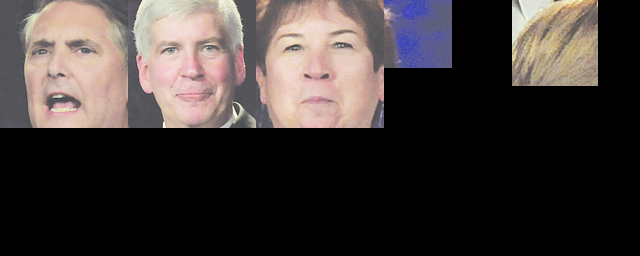

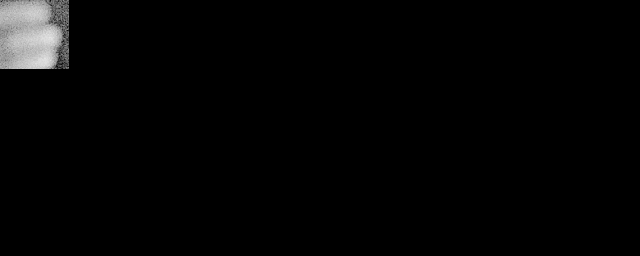

No results found in file a-1.png
No results found in file a-2.png
Results found in a-3.png


In [3]:
import zipfile
# import io
# import PIL
from PIL import Image
#from PIL import ImageDraw
import pytesseract
import cv2 as cv
import numpy as np
from io import BytesIO
# import time 

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

#%%
def get_imdict(zip_name,scaleF = 1.2,minNghb = 3):
    # loading the face detection classifier
    face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')
    
    # Creating zipfile object 
    myzip = zipfile.ZipFile(zip_name, 'r')
    
    #take the info from thefile
    info_list = myzip.infolist() # not useful...
    # print(info_list)
    
    #Taking all the file names in the zip 
    fl_names = myzip.namelist()
    
    #Creating a dictionary wtih keys the image names and values a list with first element the image object itself
    img_dict = {}
    size = 128, 128
    for i in fl_names:
        img_dict[i] = [Image.open(BytesIO(myzip.read(i)))]
        img_dict[i] = img_dict[i] + [np.asarray(img_dict[i][0])]
        #display(img_dict[i][0])    
        
        # get the text of each page and add it to the list
        img_dict[i] = img_dict[i] + [pytesseract.image_to_string(img_dict[i][0])]
        
        #find the faces,crop them,  and store them in a list
        cv_im = cv.cvtColor(img_dict[i][1],cv.COLOR_BGR2HSV)
        faces = face_cascade.detectMultiScale(cv_im,scaleF,minNghb)
        small_faces = []
        pil_img = img_dict[i][0]
        for x,y,w,h in faces:
            cur_im = pil_img.copy()
            #crop the face
            aa = cur_im.crop((x,y,x+w,y+h))
            # resize cropped to 128x128 pixels
            aa.thumbnail(size)
            # display(aa)
            #add to the list of faces
            small_faces = small_faces + [aa]
        img_dict[i] = img_dict[i] + [small_faces]
        if small_faces:
            # create the contact sheet
            first_image = small_faces[0]
            contact_sheet = Image.new(first_image.mode, (128*5,128*2))
            x = 0
            y = 0       
            for img in small_faces:
                # Lets paste the current image into the contact sheet
                contact_sheet.paste(img, (x, y) )
                # Now we update our X position. If it is going to be the width of the image, then we set it to 0
                # and update Y as well to point to the next "line" of the contact sheet.
                if x + 128 == contact_sheet.width:
                    x = 0
                    y = y + 128
                else:
                    x = x + 128                           
            img_dict[i] = img_dict[i] + [contact_sheet]
        else:
            contact_sheet = []
            img_dict[i] = img_dict[i] + [contact_sheet]
             
    myzip.close()
    return img_dict     

#%% logic:  
def get_data_from_zip(img_dict,wrd):   
    for i in  img_dict:
        # check for word in the text
        if wrd in img_dict[i][2]:
            print('Results found in ' + i)
            if img_dict[i][3]:
                display(img_dict[i][4])
            else:
                print('But there were no faces in that file')        
        else:
            print('No results found in file ' + i)
            continue

#%%   Execution 
  
zip_name = "D:/Github/small_img.zip"
img_dict = get_imdict(zip_name,scaleF = 1.25,minNghb = 5)
wrd = 'Christopher'  
get_data_from_zip(img_dict,wrd)

# for i in img_dict['a-0.png'][3]:
#     display(i)

